# This Program takes Visa/Master card transaction dataset and solve the problem of Fraud Detection:

In [16]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sb
import missingno

# Machine Learning
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import linear_model,preprocessing
from sklearn import tree
from sklearn.model_selection import  train_test_split

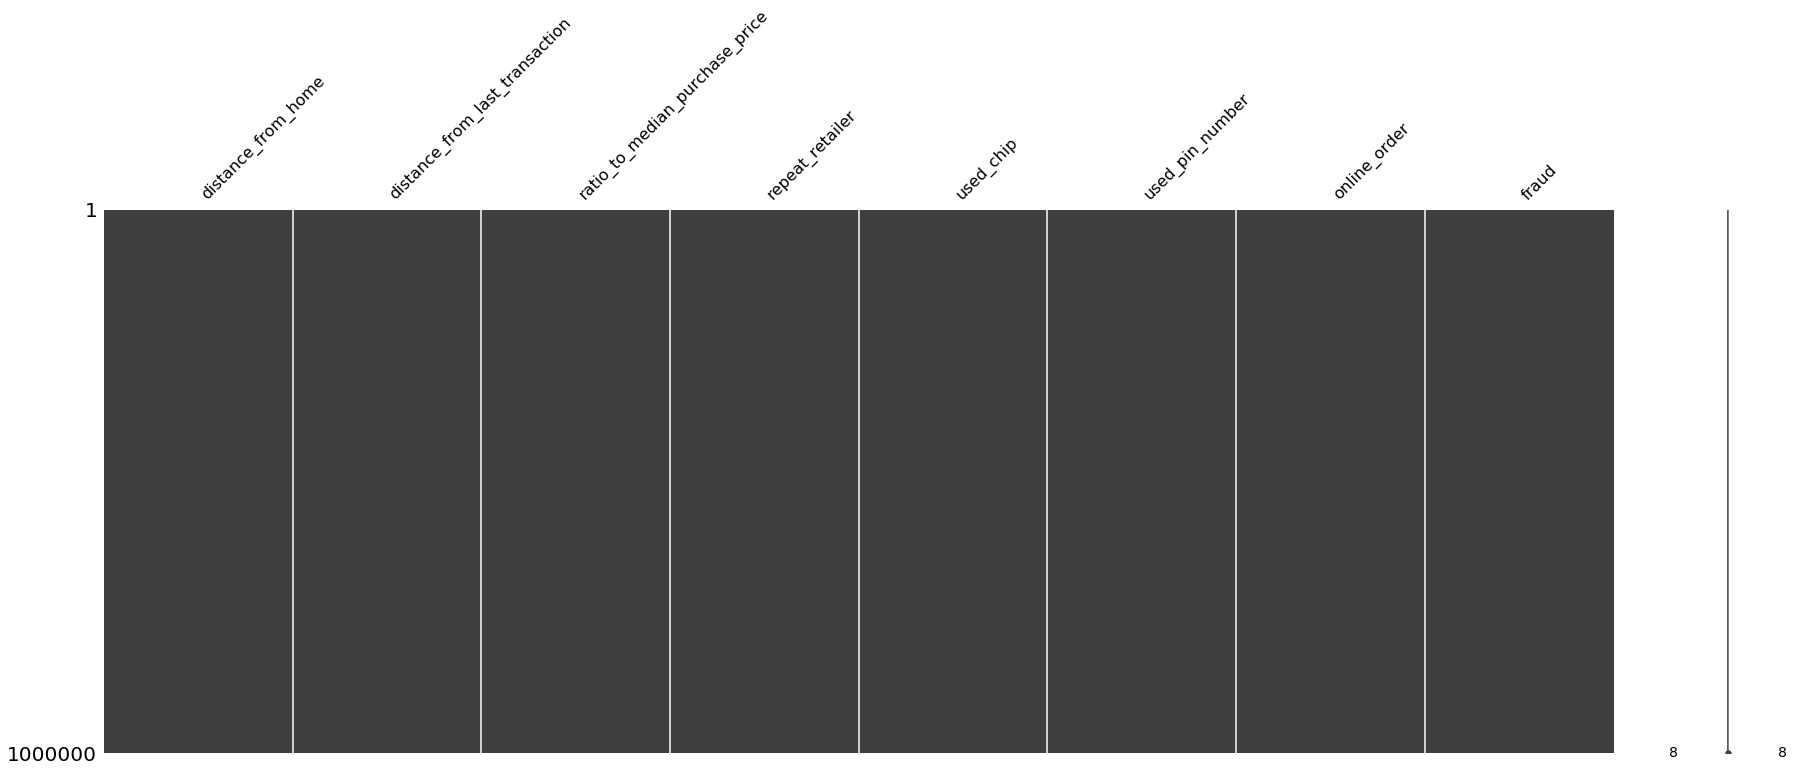

In [2]:
# Exploratory Data Analysis
df = pd.read_csv("card_transdata.csv")

#Plot null data pattern in all columns
missingno.matrix(df, figsize = (30,10))

In [3]:
# Function to show missing values in each column

def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    missing_vals_percentage={}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        missing_vals_percentage[column] = round((df_length-total_column_values)/df_length,2)*100
    return missing_vals,missing_vals_percentage

missing_values,missing_vals_percentage = find_missing_values(df, columns=df.columns)
print(missing_values)
print("\nPercentage of missing or NaN values for each column:")
missing_vals_percentage

Number of missing or NaN values for each column:
{'distance_from_home': 0, 'distance_from_last_transaction': 0, 'ratio_to_median_purchase_price': 0, 'repeat_retailer': 0, 'used_chip': 0, 'used_pin_number': 0, 'online_order': 0, 'fraud': 0}

Percentage of missing or NaN values for each column:


{'distance_from_home': 0.0,
 'distance_from_last_transaction': 0.0,
 'ratio_to_median_purchase_price': 0.0,
 'repeat_retailer': 0.0,
 'used_chip': 0.0,
 'used_pin_number': 0.0,
 'online_order': 0.0,
 'fraud': 0.0}

In [4]:
# Creating a crosstab
pd.crosstab(index=df["repeat_retailer"], columns="count")

col_0,count
repeat_retailer,
0.0,118464
1.0,881536


In [5]:
pd.crosstab(index=df["used_chip"], columns="count") 

col_0,count
used_chip,
0.0,649601
1.0,350399


In [6]:
pd.crosstab(index=df["used_pin_number"], columns="count") 

col_0,count
used_pin_number,
0.0,899392
1.0,100608


In [7]:
pd.crosstab(index=df["online_order"], columns="count") 

col_0,count
online_order,
0.0,349448
1.0,650552


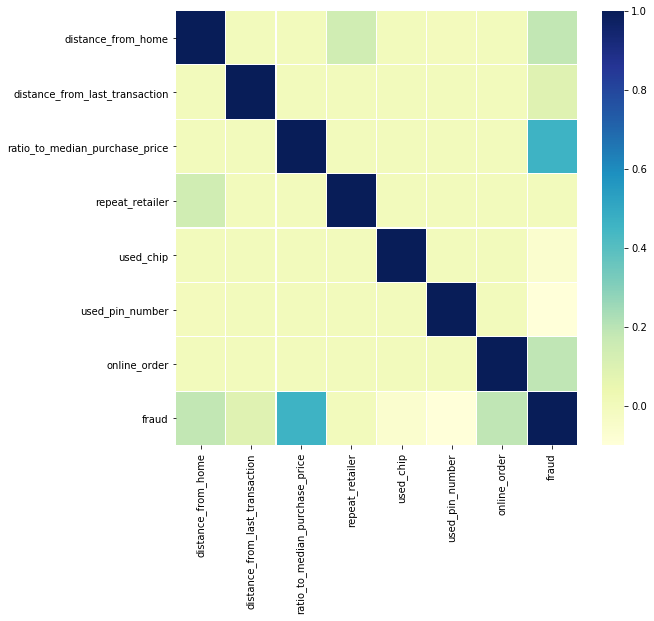

In [18]:
#Correlation Matrix
corrmat = df.corr() 

f, ax = plt.subplots(figsize =(9, 8)) 
sb.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 


In [8]:
# Load Data module
def LoadData(filename, yclasscol, cols, delim=",", normalize=True):
    y_class = [cols[yclasscol]]
    print ("y_class col=", y_class)
    features = cols[0:yclasscol]
    features += cols[yclasscol+1:]
    print ("features col=", features)
    
    df = pd.read_csv(filename, cols, delimiter=delim, delim_whitespace=False)
    df.fillna(value=0,inplace=True)
    x_df = df[features]
    y_df = df[y_class]
    x_data = np.array(pd.DataFrame(x_df, columns = features))
    y_data = np.array(pd.DataFrame(y_df, columns = y_class))
      

    x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=False)
    print (x_data_train.shape)
    return x_data_train, y_data_train, x_data_test, y_data_test
if (__name__ == "__main__"):
    print ("Executing", __name__)
else:
    print ("Importing", __name__)


Executing __main__


In [28]:
# Choose the columns required for Classification
cols = ["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price","repeat_retailer","used_chip","used_pin_number","online_order","fraud"
]
print (len(cols))
yclasscol = 7
fn = "card_transdata.csv"

# Splitting train and test data using LoadData module
x_train, y_train, x_test, y_test = \
    LoadData(fn, yclasscol=yclasscol, cols=cols, delim=",", normalize=True)
print(x_train,y_train)


8
y_class col= ['fraud']
features col= ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
(800000, 7)
[[57.87785658  0.31114001  1.94593998 ...  1.          0.
   0.        ]
 [10.8299427   0.1755915   1.29421881 ...  0.          0.
   0.        ]
 [ 5.09107949  0.80515259  0.42771456 ...  0.          0.
   1.        ]
 ...
 [ 7.29333654  0.9949192   0.6795783  ...  0.          0.
   1.        ]
 [12.61886867  3.82897591  1.87159267 ...  0.          0.
   1.        ]
 [ 2.10108365 10.51833128  0.53783513 ...  0.          0.
   1.        ]] [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [26]:
# Choose the columns required for Classification
#cols = ["ratio_to_median_purchase_price","fraud"
#]
#print (len(cols))
#yclasscol = 1
#fn = "card_transdata.csv"

# Splitting train and test data using LoadData module
#x_train, y_train, x_test, y_test = \
#    LoadData(fn, yclasscol=yclasscol, cols=cols, delim=",", normalize=True)
#print(x_train,y_train)


In [29]:
# UNIVARIATE ANALYSIS: WHICH FEATURE IMPACTS THE OUTPUT THE MOST, and then select the top
# Find variables that are most likely to impact output:
test = SelectKBest(score_func=f_classif, k=7)
fit = test.fit(x_train, y_train)
newcols = test.get_support(indices=True)
for i in range(7):
    print ("Feature = ",cols[i], ", Univariate Score", fit.scores_[i])

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature =  distance_from_home , Univariate Score 29240.09024116213
Feature =  distance_from_last_transaction , Univariate Score 6725.830204005158
Feature =  ratio_to_median_purchase_price , Univariate Score 216715.511150545
Feature =  repeat_retailer , Univariate Score 3.089590031652224
Feature =  used_chip , Univariate Score 3009.546178694389
Feature =  used_pin_number , Univariate Score 8158.329635532468
Feature =  online_order , Univariate Score 30671.11168858843


In [33]:
# Choose the columns except "Repeat_Retailer" as this feature is not important as per the Univariate Score
cols = ["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price","used_chip","used_pin_number","online_order","fraud"
]
print (len(cols))
yclasscol = 6
fn = "card_transdata.csv"

# Splitting train and test data using LoadData module
x_train, y_train, x_test, y_test = \
    LoadData(fn, yclasscol=yclasscol, cols=cols, delim=",", normalize=True)
print(x_train,y_train)

7
y_class col= ['fraud']
features col= ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'used_chip', 'used_pin_number', 'online_order']
(800000, 6)
[[57.87785658  0.31114001  1.94593998  1.          0.          0.        ]
 [10.8299427   0.1755915   1.29421881  0.          0.          0.        ]
 [ 5.09107949  0.80515259  0.42771456  0.          0.          1.        ]
 ...
 [ 7.29333654  0.9949192   0.6795783   0.          0.          1.        ]
 [12.61886867  3.82897591  1.87159267  0.          0.          1.        ]
 [ 2.10108365 10.51833128  0.53783513  0.          0.          1.        ]] [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [34]:
# Using a DECISION TREE CLASSIFIER for Fraud detetction
model = DecisionTreeClassifier(criterion = "gini", splitter = "best")
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)
print ("Test data accuracy", accuracy_score(y_test, y_pred_test))
print ("Train data accuracy", accuracy_score(y_train, y_pred_train))
print ("Train Data score", model.score(x_train, y_train))

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test =  confusion_matrix(y_pred_test, y_test)
print ("\nTrain data Confusion Matrix\n", cm_train)
print ("\nTest data Confusion Matrix\n", cm_test)


Test data accuracy 0.999995
Train data accuracy 1.0
Train Data score 1.0

Train data Confusion Matrix
 [[730098      0]
 [     0  69902]]

Test data Confusion Matrix
 [[182499      1]
 [     0  17500]]


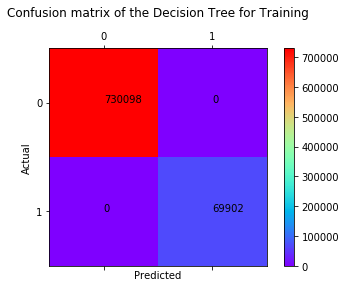

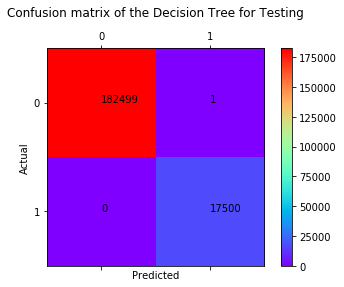

In [35]:
# Confusion matrix of the Decision Tree
import matplotlib.pyplot as plt
%matplotlib inline  

def doPlot(cm, labels, tit):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    c = ax.matshow(cm, cmap=plt.cm.rainbow)
    plt.title('Confusion matrix of the Decision Tree for ' + tit +'\n')
    fig.colorbar(c)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(cm[i][j]))
    plt.show()
    
doPlot(cm_train, ["0","1"], "Training")
doPlot(cm_test, ["0","1"], "Testing")

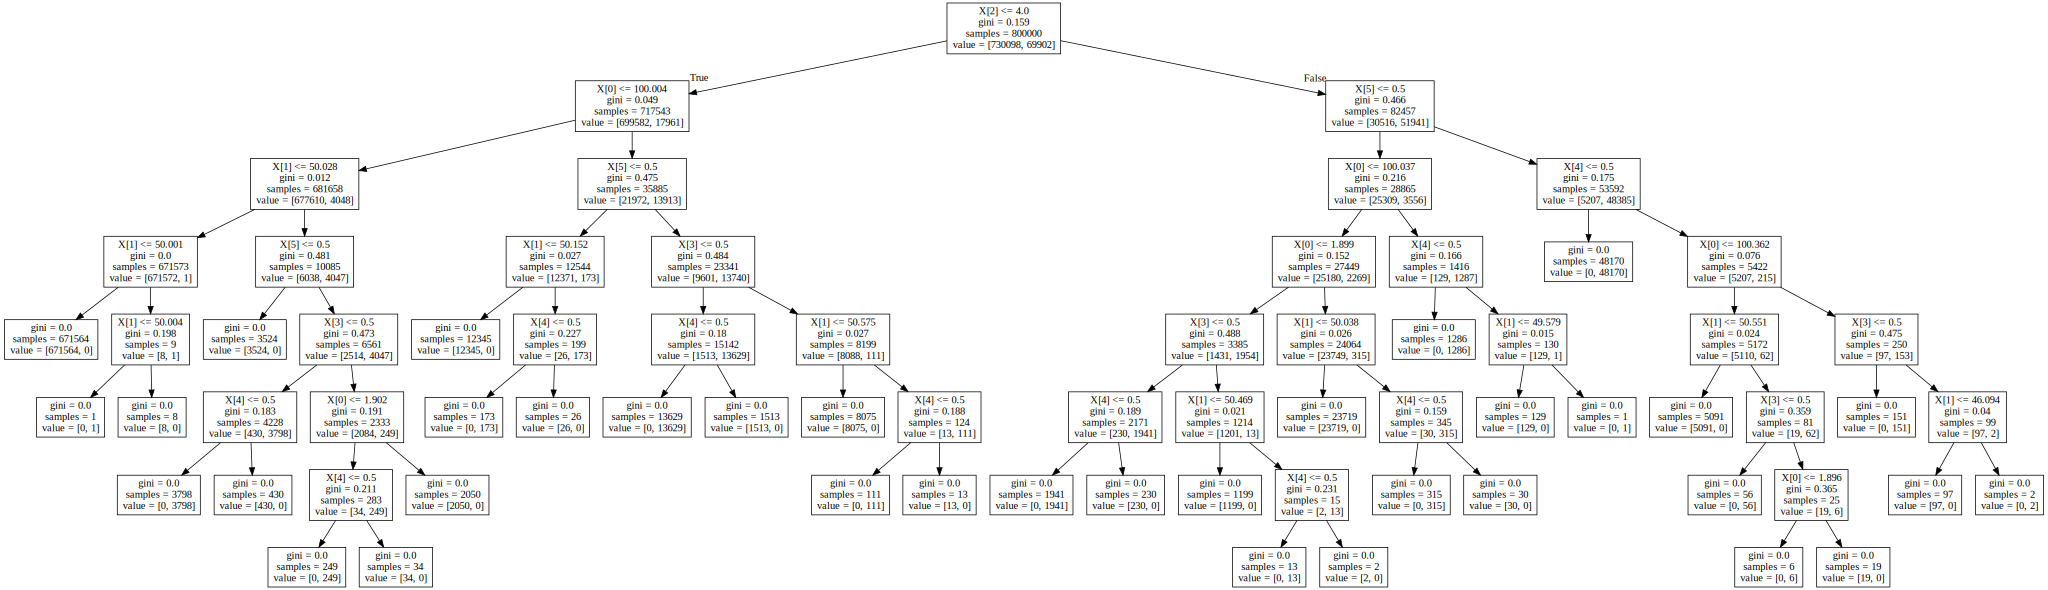

In [36]:
# DECISION TREE STRUCTURE

import os
import graphviz
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
dot_data = tree.export_graphviz(model,out_file=None)
graph = graphviz.Source(dot_data)
graph

In [45]:
# Using LOGISTIC REGRESSION for Fraud detetction
lrmodel = LogisticRegression(fit_intercept = True, C = 1e16,  solver = "newton-cg", max_iter=100)
lrmodel.fit(x_train, y_train)
y_pred_test = lrmodel.predict(x_test)
y_pred_train = lrmodel.predict(x_train)
print ("Test data accuracy", accuracy_score(y_test, y_pred_test))
print ("Train data accuracy", accuracy_score(y_train, y_pred_train))
print ("Train Data score", lrmodel.score(x_train, y_train))

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test =  confusion_matrix(y_pred_test, y_test)
print ("\nTrain data Confusion Matrix\n", cm_train)
print ("\nTest data Confusion Matrix\n", cm_test)

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test data accuracy 0.9585
Train data accuracy 0.95866
Train Data score 0.95866

Train data Confusion Matrix
 [[724990  27964]
 [  5108  41938]]

Test data Confusion Matrix
 [[181213   7014]
 [  1286  10487]]


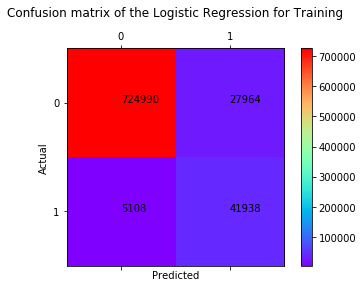

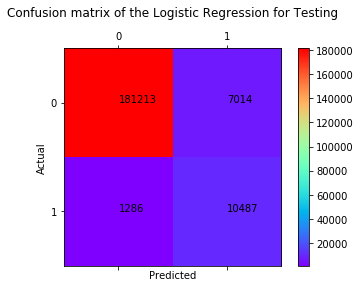

In [46]:
# Confusion matrix of the Logistic Regression
import matplotlib.pyplot as plt
%matplotlib inline  

def doPlot(cm, labels, tit):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    c = ax.matshow(cm, cmap=plt.cm.rainbow)
    plt.title('Confusion matrix of the Logistic Regression for ' + tit +'\n')
    fig.colorbar(c)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(cm[i][j]))
    plt.show()
    
doPlot(cm_train, ["0","1"], "Training")
doPlot(cm_test, ["0","1"], "Testing")